# INTRODUCTION :

In this article, i am analyzing data from my favourite website Stackoverflow, which is community driven platform for coders, developers and is great thing for us programmers.

For this, i am using stackoverflow 2017 survey data-set. Stackoverflow every year is known to conduct massive survey, covering all sorts of information related to development(web,software), jobs, best coding practices, which language is currently in boom and various others.

### My Research Questions:
* Which programming(coding) language is most popular in India?<br>
* What coding language does company wants from their employee(w.r.t India)<br>
* Which programming language has highest job satisfaction?<br>
* What is average salary of each programming langauge?<br>


I will follow the below pipeline to deal with this project<br>

### Pipeline:
* Business Understanding(common to all)<br>
* Data Understanding(common to all)<br>
* Data cleaning and modeling(with respect to each question)<br>
* Results(with respect to each question)<br>

# 1. Business Understanding
As i mentioned In this notebook, I will be exploring the 2017 Stack Overflow results in order to get some insights on below research questions:
There will be four questions which i am exploring(Note all the questions are with respect to year 2017):
1. Which programming(coding) language is most popular in India?
2. What coding language does company wants from their employee(w.r.t India)
3. Which programming language has highest job satisfaction?
4. What is average salary of each programming langauge?

# 2. Data Understanding


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline

In [6]:
df = pd.read_csv('survey_results_public.csv')
schema = pd.read_csv('survey_results_schema.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Columns: 154 entries, Respondent to ExpectedSalary
dtypes: float64(6), int64(1), object(147)
memory usage: 60.4+ MB


### Preparation

As per my research questions the columns which can be of my interest are:

1. Country
2. age
3. IT/Programming experience
4. industry
5. size of company
6. occupation
7. languages
8. salary
9. HaveWorkedLanguage
10. WantWorkLanguage

I am now applying modeling, cleaning and EDA specifically to questions. Let's first create functions which might be useful.

In [53]:
df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


In [42]:
def filter_country(df, column_filter, country, columns):
    ''' Filter a dataframe by country.,
        returns filtred dataframe.
    '''
    
    df_copy = df
    
    for column in columns: 
        df_copy = df_copy[df_copy[column_filter] == country].dropna(subset=[column])
        
    return df_copy


def split_column(df, column):
    ''' Split column by ;,
        returns a splited series.
    '''
    
    df_copy = df
    column_series = df_copy[column].apply(lambda x: x.split(';'))
    
    return column_series


def disarray(array_list):
    ''' Flat a nested list,
        returns a flat list.
    '''
    
    objects = []
    
    for row in array_list:
        for obj in row:
            objects.append(obj.strip())
            
    return objects


def group_list(data_list, year):
    ''' Group by count to a list,
        returns a result dict.
    '''
    
    grouped_list = dict(Counter(data_list))
    grouped_dict = [{'Programming Language':key, 'Count': value, 'Year': year} for key, value in grouped_list.items()]
    
    return grouped_dict

def split_column_advance(column_to_split, delimeter, column_to_store, df):
    """
    Method to split a columns values by a provided delimeter while
    retaining the associated value of another column.
    
    :param str column_to_split: column whose values are to be split
    :param str delimeter: delimeter to split by
    :param str columns_to_store: column who's data must be stored along split rows
    :param DataFrame df: dataframe to use
    """
    split_col = pd.DataFrame(columns = [column_to_split, column_to_store])
    for index, row in df.iterrows():
        columns = row[column_to_split].split(delimeter)
        for c in columns:
            split_col.loc[len(split_col)] = [c, row[column_to_store]]
    return split_col

## I. Which programming(coding) language is most popular in India?

### I.1. Prepare Data and Modelling
As per the requirement i am select relevant columns for clear-cut and unambiguous analysis

In [43]:
india_2017 = filter_country(df, 'Country', 'India', ['HaveWorkedLanguage', 'WantWorkLanguage'])

In [44]:
# Splitting the Data Frame by column into a Series. 
worked_lang_2017 = split_column(india_2017, 'HaveWorkedLanguage')
wanted_lang_2017 = split_column(india_2017, 'WantWorkLanguage')

In [45]:
# Flatting nested list objects.
list_worked_languages_2017 = disarray(worked_lang_2017)
list_wanted_languages_2017 = disarray(wanted_lang_2017)

In [46]:
# Groping a list and creating a dict.
dict_worked_languages_2017 = group_list(list_worked_languages_2017, '2017')
dict_wanted_languages_2017 = group_list(list_wanted_languages_2017, '2017')

In [47]:
# Creating a Data Frame appending the data.
worked_languages = pd.DataFrame(dict_worked_languages_2017)
wanted_languages = pd.DataFrame(dict_wanted_languages_2017)
# print(worked_languages)

### I.2. Visualization 

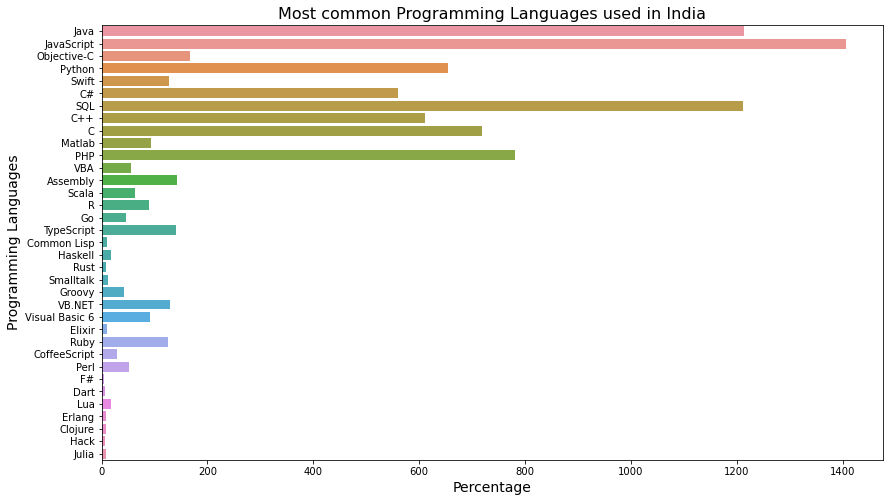

In [48]:
plt.figure(figsize=(14,8))
sns.barplot(x = 'Count', 
            y = 'Programming Language',
            data = worked_languages)

plt.xlabel("Percentage", fontsize = 14)
plt.ylabel("Programming Languages", fontsize = 14)
plt.title('Most common Programming Languages used in India', size = 16)
plt.show()

### I.3. RESULT:
It is clearly visible that Javascript was the most popular language in india. Second popular language was Java. The least popular language is F#. I think still in present day Javascript is equally popular.

## II. What coding language does company wants from their employee(w.r.t India)?

### II.1. Prepare Data and Modelling:
This phase is already done in part I, so here i am just doing visualization and analysis. Actually this question can be considered as extension to previous question

### II.2. Visualization

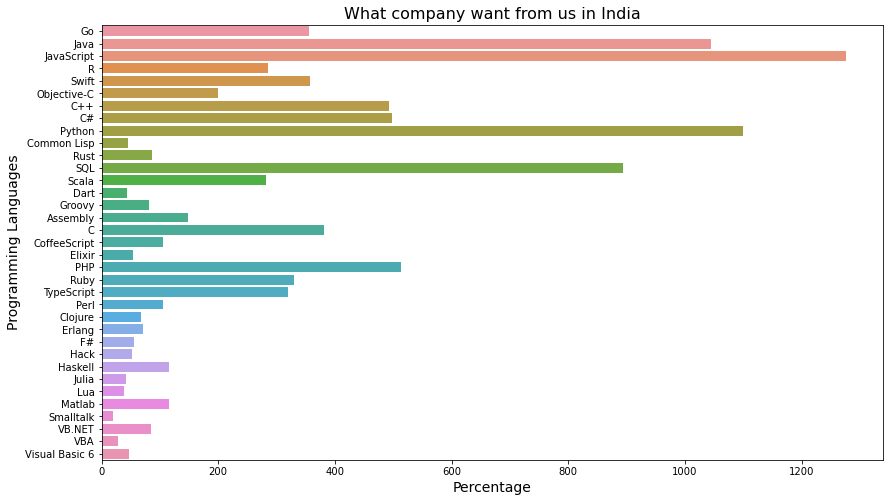

In [49]:
plt.figure(figsize=(14,8))
sns.barplot(x = 'Count', 
            y = 'Programming Language',
            data = wanted_languages)

plt.xlabel("Percentage", fontsize = 14)
plt.ylabel("Programming Languages", fontsize = 14)
plt.title('What company want from us in India', size = 16)
plt.show()

### II.3. RESULT
From above plot It is clearly visible that in india most companies want Javascript developers. Second choice is java, thus most companies in india were working in Javascript and Java. This makes sense also, as this result is totally inclined to pevious result and web development is really important. The least popular language is Smalltalk.

## III: Which programming language has the highest job satisfaction?

### III.1. Prepare Data and Modelling:
All rows were dropped where the Professional column did not equal "Professional Developer" as I was only interested in Professional Developers.If the row had JobSatisfaction or HaveWorkedLanguage as Nan then the row would be dropped. 

In [50]:
q3 = df[['Professional', 'HaveWorkedLanguage', 'JobSatisfaction']]

q3 = q3[q3.Professional == "Professional developer"]
q3 = q3.drop('Professional', 1)
q3 = q3.dropna(subset=['JobSatisfaction', 'HaveWorkedLanguage'], axis=0)
q3.head()

,HaveWorkedLanguage,JobSatisfaction
2,Java; PHP; Python,9.0
7,CoffeeScript; Clojure; Elixir; Erlang; Haskell...,7.0
8,C#; JavaScript,6.0
9,Objective-C; Swift,8.0
13,Java; JavaScript; Ruby; SQL,6.0


In [12]:
split_languages_q3 = split_column("HaveWorkedLanguage", "; ", "JobSatisfaction", q3)

In [13]:
q3_answer = split_languages_q3.groupby(['HaveWorkedLanguage']).mean()['JobSatisfaction'].sort_values()
q3_answer.head(50)

HaveWorkedLanguage
Visual Basic 6    6.877934
VB.NET            6.975970
VBA               7.000000
Perl              7.045333
Java              7.050697
SQL               7.056984
PHP               7.061347
C#                7.061877
Clojure           7.076923
JavaScript        7.096789
C                 7.111556
Groovy            7.122396
Rust              7.123894
Ruby              7.132231
C++               7.139710
R                 7.153584
Python            7.197758
Haskell           7.209302
Swift             7.228659
Matlab            7.262774
Lua               7.266667
F#                7.278481
TypeScript        7.284790
Common Lisp       7.285714
Go                7.303462
CoffeeScript      7.310249
Scala             7.320276
Assembly          7.350148
Elixir            7.358333
Julia             7.391304
Objective-C       7.403983
Dart              7.424242
Erlang            7.432432
Smalltalk         7.493750
Hack              7.666667
Name: JobSatisfaction, dtype: float6

### III.2. Visualization

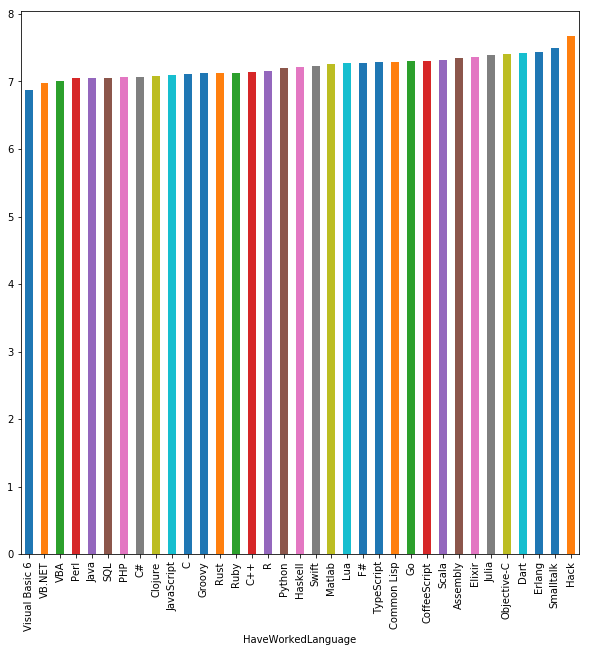

In [15]:
plt.figure(figsize=(10,10))
q3_answer.plot(kind = 'bar')
plt.savefig('q3')

### III.3. RESULT
We can clearly see that those with more specialised skill sets feel that they are more valuable and therefore are more satisfied with their jobs, it could simply be that those who are paid more are more satisfied. A hacker definitely will have better skills and important position in any company, so this graph clearly show such kind of behaviour.

## IV:  What is the average salary for each programming language?

### IV.1. Prepare Data and Modelling

I am dropping all the rows where Professional column != "Professional Developer" as I was only interested in Professional Developers. If the row had Salary or HaveWorkedLanguage as Nan then the row would be dropped. 

In [51]:
q4 = df[['Professional', 'HaveWorkedLanguage', 'Salary']]
q4 = q4[q4.Professional == "Professional developer"]
q4 = q4.drop('Professional', 1)
q4 = q4.dropna(subset=['Salary', 'HaveWorkedLanguage'], axis=0)
q4.head()
split_languages = split_column_advance("HaveWorkedLanguage", "; ", "Salary", q4)
split_languages.head()

,HaveWorkedLanguage,Salary
0,Java,113750.0
1,PHP,113750.0
2,Python,113750.0
3,Assembly,100000.0
4,C,100000.0


### IV.2. Visualization

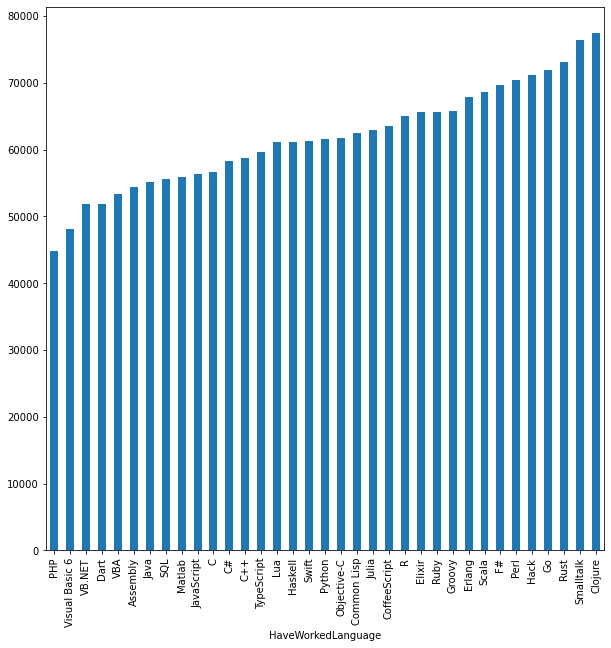

In [40]:
q4_answer = split_languages.groupby(['HaveWorkedLanguage']).mean()['Salary'].sort_values()
plt.figure(figsize=(10,10))
q4_answer.plot(kind = 'bar')
plt.savefig('q4')

### IV.3. Results
This bar chart structure(behaviour) is similar to above bar chart, which kinda make sense, satisfaction is money for someone(or most of us), the average salaries for each language range from mid 40,000 to over 80,000. What’s interesting is that the most popular languages that we found in the last section are of a lower salary expectation and the least popular languages have higher average salaries. This makes sense as if less people know how to use a language, that skill warrants a higher salary.